## NLP

    Natural language processing(NLP) is a subfield of linguistics, computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.

**Topics to learn**

1. [Tokenization](#Tokenization) (Pre-trained or Unsupervised)
    - [Word Tokenize](#NLTK-word-tokenizer-nltk.word_tokenize())
    - [Sentence Tokenize](#NLTK-sentence-tokenizer-nltk.sent_tokenize())
    - [Token Span](#NLTK-token-span-WhitespaceTokenizer)
    - [Text Processsing using PlaintextCorpusReader](#Simple-Text-Processing-NLTK)
        - [Methods](#Methods-in-PlaintextCorpusReader)
    - [Using NLTK Text module](#Using-the-Text-method-to-analyze-the-text-nltk.text.Text)
        - [Methods](#Methods)
2. [Stop Words](#Stop-Words)
3. [POS Tagging](#POS-Tagging)
4. [Lematization](#Lematization)
5. [Stemming](#Stemming)
    - [Porter](#Porter-Stemmer)
    - [Lancaster](#Lancaster-Stemmer)
    - [Snowball / English](#Snowball-Stemmer)
6. [Chunking](#Chunking)
    - [Steps](#Steps-to-implement-Chunking)
7. [Chinking](#Chinking)
8. [Named Entity Recognition (NER)](#NER)
9. [Word Cloud](#Word-Cloud)

### Tokenization

     The conversion of a string of words to a list of words is called tokenization

Resources:
1. <a href="http://www.tulane.edu/~howard/NLP/nlp.html#tokenization-again"> Howard </a>
2. <a href="https://pythonprogramming.net/named-entity-recognition-nltk-tutorial/">Sentdex</a>

#### NLTK word tokenizer ```nltk.word_tokenize() ```

    Return a tokenized copy of text, using NLTK’s recommended word tokenizer (currently an improved 
    TreebankWordTokenizer along with PunktSentenceTokenizer for the specified language).

Parameters
- text (str) – text to split into words
- language (str) – the model name in the Punkt corpus
- preserve_line (bool) – An option to keep the preserve the sentence and not sentence tokenize it.

Points
- It splits standard contractions, e.g. “don’t” -> “do”, “n’t” and “they’ll” -> “they”, “‘ll.”
- It treats most punctuation characters as separate tokens.
- It splits off commas and single quotes, when followed by whitespace.
- It separates periods that appear at the end of line

#### NLTK sentence tokenizer ```nltk.sent_tokenize()``` 

    Return a sentence-tokenized copy of text, using NLTK’s recommended sentence tokenizer (currently 
    PunktSentenceTokenizer for the specified language).

Parameters
- text – text to split into sentences
- language – the model name in the Punkt corpus

#### NLTK token-span ```WhitespaceTokenizer```

    NLTK tokenizers can produce token-spans, represented as tuples of integers having the same semantics as string 
    slices, to support efficient comparison of tokenizers. (These methods are implemented as generators.)
    

In [ ]:
import nltk
S = '''This above all: to thine own self be true, 
    And it must follow, as the night the day, 
    Thou canst not then be false to any man.'''

In [ ]:
# Word Tokenizer

nltk.word_tokenize(S) 

In [ ]:
# Sentence Tokenizer

nltk.sent_tokenize(S) 

In [ ]:
nltk.WhitespaceTokenizer().span_tokenize(S) # Used as Generator

In [ ]:
list(nltk.WhitespaceTokenizer().span_tokenize(S))

In [ ]:
nltk.download()

#### Simple Text Processing NLTK

    One of the reasons for using NLTK is that it relieves us of much of the effort of making a raw text 
    amenable to computational analysis. It does so by including a module of corpus readers, which pre-process 
    files for certain tasks or formats. Most of them are specialized for particular corpora, so we will start 
    with the basic one, called the PlaintextCorpusReader

In [ ]:
from nltk.corpus import PlaintextCorpusReader
Reader = PlaintextCorpusReader('./data/', 'review.txt', encoding='utf-8')

In [ ]:
Words = Reader.words()
print(len(Words))
Words[:50]

#### Methods in PlaintextCorpusReader
- **Reader.raw()** # Returns the string from which the file was read
- **Reader.sents()** # Tokenizes the string to a list of lists of of strings, each of which is a sentence,
- **Reader.fileids()** # Returns the file that the reader is reading.
- **Reader.abspath('review.txt')** # Returns a ```FileSystemPathPointer``` to that file
- **Reader.root** # Returns a ```FileSystemPathPointer``` to the current working directory 
- **Reader.encoding('review.txt')** # Returns the encoding of the file being read.
- **Reader.readme()** # Returns the Readme for the file which is not there in this case

#### Using the ```Text``` method to analyze the text ```nltk.text.Text```

    The text methods of Text provide a shortcut to text analysis.

#### Methods

 
- collocations(num=20, window_size=2)
        
        A collocation is a group of words that occur together frequently in a text.
        Print collocations derived from the text, ignoring stopwords.

- collocation_list(num=20, window_size=2)
        
        Return collocations derived from the text, ignoring stopwords.

- common_contexts(words, num=20)
 
        Find contexts where the specified words appear; list most frequent common contexts first.

- concordance(self, word, width=79, lines=25)
    
        It is often helpful to know the context of a word. The concordance view shows a certain number of 
        characters before and after every occurrence of a given word:
    
- concordance_list(self, word, width=79, lines=25)
    
        Generate a concordance for "word" with the specified context window.
        Word matching is not case-sensitive.

- similar(self, word, num=20)
    
        Distributional similarity: find other words which appear in the
        same contexts as the specified word; list most similar words first.
 

In [ ]:
def textLoader(doc, loc = '', encoding='utf-8'):
    from nltk.corpus import PlaintextCorpusReader
    from nltk.text import Text
    return Text(PlaintextCorpusReader(loc, doc, encoding=encoding).words())

In [ ]:
review = textLoader('review.txt', './data')

In [ ]:
# Known bug with
# review.collocation() 

print('; '.join(review.collocation_list()))

In [ ]:
review.common_contexts(['jackie'])

In [ ]:
review.concordance('jackie')

In [ ]:
review.similar('sahara')

### Stop Words
    
    Words that are very frequent but not particularly informative are called stop words in computational linguistics. There 
    is no definitive list for English, but most start with a list drawn up by Martin Porter and organized by 
    grammatical form    

In [ ]:
from nltk import word_tokenize
with open("./data/review.txt", 'r') as f:
    raw_text = f.read()
f.close()

tokenized = word_tokenize(raw_text)

In [ ]:
from nltk.probability import FreqDist

freq_dist = FreqDist(t for t in tokenized)
freq_dist.plot(30)

**The above graph contain words like 'the' or some punctuations like '.' which are irrelevant and not usefull.** 

Let's remove them

In [ ]:
from nltk.corpus import stopwords
eng_stop = stopwords.words("english")

In [ ]:
len(eng_stop)

In [ ]:
# Removing stop words and punctuations from the list of words
cleaned = [word for word in tokenized if word not in eng_stop and word.isalnum()]

In [ ]:
cleaned_dist = FreqDist(t for t in cleaned)
cleaned_dist.plot(30)

### POS Tagging

    The process of classifying words into their parts of speech and labeling them accordingly is known as part-of-speech 
    tagging, POS-tagging, or simply tagging.

List of **Penn Treebank** POS tags: <a href=https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html>Tags Table</a>


**NOTE:** Use this command to see the details of any tags you want information on

```python
    nltk.help.upenn_tagset('VBG')
```


**POS tag list:**

    CC    coordinating conjunction
    CD    cardinal digit
    DT    determiner
    EX    existential there (like: "there is" ... think of it like "there exists")
    FW    foreign word
    IN    preposition/subordinating conjunction
    JJ    adjective	'big'
    JJR   adjective, comparative	'bigger'
    JJS   adjective, superlative	'biggest'
    LS    list marker	1)
    MD    modal	could, will
    NN    noun, singular 'desk'
    NNS   noun plural	'desks'
    NNP   proper noun, singular	'Harrison'
    NNPS  proper noun, plural	'Americans'
    PDT   predeterminer	'all the kids'
    POS   possessive ending	parent\'s
    PRP   personal pronoun	I, he, she
    PRP   possessive pronoun	my, his, hers
    RB    adverb	very, silently,
    RBR   adverb, comparative	better
    RBS   adverb, superlative	best
    RP    particle	give up
    TO    to go 'to' the store.
    UH    interjection	errrrrrrrm
    VB    verb, base form	take
    VBD   verb, past tense	took
    VBG   verb, gerund/present participle	taking
    VBN   verb, past participle	taken
    VBP   verb, sing. present, non-3d	take
    VBZ   verb, 3rd person sing. present	takes
    WDT   wh-determiner	which
    WP    wh-pronoun	who, what
    WP    possessive wh-pronoun	whose
    WRB   wh-abverb	where, when

In [ ]:
from nltk.tag import pos_tag
nltk_POS = pos_tag(cleaned)

In [ ]:
nltkTags = [pair[1] for pair in nltk_POS]
nltkTags

### Lematization

    You are probably aware of the fact that a word can have different forms. A noun like cat can occur as cats, cat’s, or 
    cats’ (plural, possessive and plural possessive), a verb like to love can also be used as loves, loved, or loving 
    (third person singular, past tense/past participle or present participle/gerund). An adjective like tall can be used 
    in comparatives as taller and superlatives as tallest. These are all examples of inflection, in which a base form or 
    lemma is inflected, here by suffixes. The process of removing inflectional morphology is known as lemmatization.

In [ ]:
from nltk import WordNetLemmatizer

wnl = WordNetLemmatizer()
lematized = [wnl.lemmatize(word) for word in cleaned]

In [ ]:
for row in zip(cleaned, nltkTags, lematized):
    print(row)

### Stemming
    
    Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of 
    words known as a lemma. For example: words such as “Likes”, ”liked”, ”likely” and ”liking” will be reduced to “like” 
    after stemming.
    
NLTK has at least four modules for stemming.
   - Porter Stemmer
   - Lancaster Stemmer
   - Snowball Stemmer


#### Porter Stemmer

In [ ]:
from nltk.stem.porter import PorterStemmer
PStemmer = PorterStemmer()
pstem = [PStemmer.stem(word) for word in cleaned]

#### Lancaster Stemmer

In [ ]:
from nltk.stem.lancaster import LancasterStemmer
LStemmer = LancasterStemmer()
lstem = [LStemmer.stem(word) for word in cleaned]

#### Snowball Stemmer

In [ ]:
from nltk.stem.snowball import EnglishStemmer
EStemmer = EnglishStemmer()
estem = [EStemmer.stem(word) for word in cleaned]

In [ ]:
for row in zip(cleaned, nltkTags, lematized, pstem, lstem, estem):
    print(row)

### Chunking
     
   **Def 1.**
    
    Chunking is a term referring to the process of taking individual pieces of information (chunks) and grouping them 
    into larger units. By grouping each piece into a large whole, which sometimes correspond to syntactic phrases.
    
   **Def 2.**
    
    Chunking is a process of extracting phrases from unstructured text, which means analyzing a sentence to identify the
    constituents(Noun Groups, Verbs, verb groups, etc.) However, it does not specify their internal structure, nor their 
    role in the main sentence.
    It works on top of POS tagging. It uses POS-tags as input and provides chunks as output.

#### Steps to implement Chunking

The first step is devise a label for the chunk. This one is easy:
```python
    chunkLabel = 'NP'
```

This module implements a regular-expression-like language for creating tag patterns items are surrounded by angled brackets, <>.

Let's check one example, ```<DT> <JJ> <NN>```, but the latter two have alternative forms. These can be incorporated regex-ly, as ```<DT> <JJ.*> <NN.*>```, which can be assigned to a pattern:

```python
    chunkPattern = '<DT> <JJ.*> <NN.*>'
```
You now call a method to roll the pattern up into a rule, which includes a string for storing a description, which I will just fill in with the label assigned above:

```python
    Chunker = ChunkRule(chunkPattern, chunkLabel)
```
    
And you initialize a parser that uses this rule:

```python
    chunkParser = RegexpChunkParser([Chunker], chunk_label=chunkLabel)
```

**Think about this**

    Chunking only makes sense when applied to sentences, so you need the text tokenized into sentences and not words. 
    But NLTK’s sentence tokenizer leaves each sentence untouched, formatted as a string, so each sentence has to be 
    tokenized into words. Then the words need to be tagged with their part of speech. Then the tagged words can be chunked 
    into noun phrases. Then the user should be notified of the result, but the tricky part is that a sentence can have no 
    NP chunks, one such chunk, or more than one. So a sentence itself has to be scanned for the proper chunks. Let us call 
    the temporary chunks subtrees. Fortunately, they will be labeled as NP, so only those need be reported.

In [ ]:
from nltk.chunk.regexp import ChunkRule, RegexpChunkParser
from nltk import sent_tokenize
sentences = sent_tokenize(raw_text)

chunkLabel = 'NP'
chunkPattern = '<DT> <JJ.*> <NN.*>'
Chunker = ChunkRule(chunkPattern, chunkLabel)
chunkParser = RegexpChunkParser([Chunker], chunk_label=chunkLabel)

for s in sentences:
    tokenizedS = word_tokenize(s)
    taggedS = pos_tag(tokenizedS)
    chunkedS = chunkParser.parse(taggedS)
    for subtree in chunkedS.subtrees():
        if subtree.label() == chunkLabel:
            print(subtree)

### Chinking

    Sometimes it is easier to define what we want to exclude from a chunk. We can define a chink to be a sequence of 
    tokens that is not included in a chunk. 
    
    Chinking is the process of removing a sequence of tokens from a chunk. If the matching sequence of tokens spans an 
    entire chunk, then the whole chunk is removed; if the sequence of tokens appears in the middle of the chunk, these 
    tokens are removed, leaving two chunks where there was only one before. If the sequence is at the periphery of the 
    chunk, these tokens are removed, and a smaller chunk remains.

    Example: The little yellow dog barked at the cat

<table>
    <thead valign="bottom">
    <tr>
        <th class="head">Method</th>
        <th class="head">Entire chunk</th>
        <th class="head">Middle of a chunk</th>
        <th class="head">End of a chunk</th>
    </tr>
    </thead>
    <tbody valign="top">
    <tr>
        <td><em>Input</em></td>
        <td>[a/DT little/JJ
            dog/NN]
        </td>
        <td>[a/DT little/JJ
            dog/NN]
        </td>
        <td>[a/DT little/JJ
            dog/NN]
        </td>
    </tr>
    <tr>
        <td><em>Operation</em></td>
        <td>Chink "DT JJ NN"</td>
        <td>Chink "JJ"</td>
        <td>Chink "NN"</td>
    </tr>
    <tr>
        <td><em>Pattern</em></td>
        <td>}DT JJ NN{</td>
        <td>}JJ{</td>
        <td>}NN{</td>
    </tr>
    <tr>
        <td><em>Output</em></td>
        <td>a/DT little/JJ
            dog/NN
        </td>
        <td>[a/DT] little/JJ
            [dog/NN]
        </td>
        <td>[a/DT little/JJ]
            dog/NN
        </td>
    </tr>
    </tbody>
</table>

In [ ]:
import nltk
grammar = r"""
  NP:
    {<.*>+}          # Chunk everything
    }<VBD|IN>+{      # Chink sequences of VBD and IN
  """
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"),
       ("dog", "NN"), ("barked", "VBD"), ("at", "IN"),  ("the", "DT"), ("cat", "NN")]
cp = nltk.RegexpParser(grammar)
cp.parse(sentence)

### NER

    One of the most major forms of chunking in natural language processing is called "Named Entity Recognition." The idea is 
    to have the machine immediately be able to pull out "entities" like people, places, things, locations, monetary 
    figures, and more.

In [ ]:
import nltk
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")

In [ ]:
# Training the PunktSentenceTokenizer
custom_sent_tokenizer = PunktSentenceTokenizer(train_text)
tokenized = custom_sent_tokenizer.tokenize(sample_text)

def process_content():
    try:
        for i in tokenized[5:]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            namedEnt = nltk.ne_chunk(tagged, binary=True)
            namedEnt.draw()
    except Exception as e:
        print(str(e))


process_content()

In [ ]:
# Using pre trained model
pre_tokenizer = PunktSentenceTokenizer()
tokenized_pre_trained = pre_tokenizer.tokenize(sample_text)

words = nltk.word_tokenize(tokenized_pre_trained[4])
tagged = nltk.pos_tag(words)
namedEnt = nltk.ne_chunk(tagged, binary=True)
namedEnt.draw()

### Word Cloud

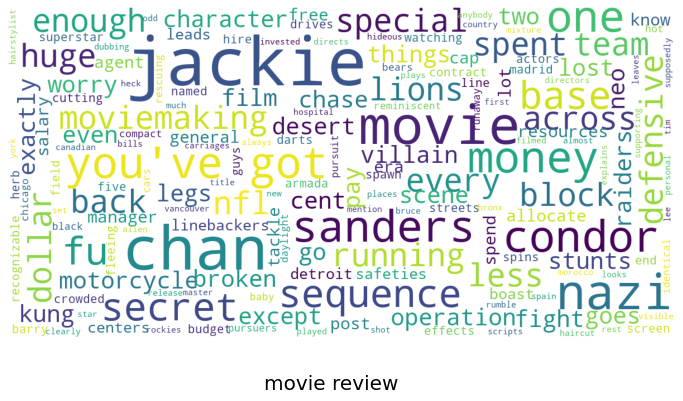

In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

with open("./data/review.txt", 'r') as f:
    raw_text = f.read()
f.close()
show_wordcloud(raw_text, "movie review")